# Understanding factors for Churn in a Telecom Company

Case Study- Churn in Telecom's dataset

Source credit- https://www.kaggle.com/becksddf/churn-in-telecoms-dataset


# Context:
Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

Content:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
The dataset contains the above information about the data.


Inspiration:
To explore this type of models and learn more about the subject as  the questions include exploratory data analysis.



# About the Data:

The dataset is about telecom industry which tells about the number of customers who churned the service. It consists of 3333 observations having 21 variables. We have to predict which customer is going to churn the service.

Account Length: how long account has been active.
VMail Message: Number of voice mail messages send by the customer.

Day Mins: Time spent on day calls.

Eve Mins: Time spent on evening calls.

Night Mins: Time spent on night calls.

Intl Mins: Time spent on international calls.

Day Calls: Number of day calls by customers.

Eve Calls: Number of evening calls by customers.

Intl Calls: Number of international calls.

Night Calls: Number of night calls by customer.

Day Charge: Charges of Day Calls.

Night Charge: Charges of Night Calls.

Eve Charge: Charges of evening Calls.

Intl Charge: Charges of international calls.

VMail Plan: Voice mail plan taken by the customer or not.

State: State in Area of study.

Phone: Phone number of the customer.

Area Code: Area Code of customer.

Intl Plan: Does customer have international plan or not.

CustServ Calls: Number of customer service calls by customer.

Churn : Customers who churned the telecom service or who doesn’t(0=“Churner”, 1=“Non-Churner”)


# 1.Import necessary libraries

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
#

# 2.Import the data

In [3]:
ch = pd.read_csv("Churn.csv")

# 3.How do we display the dataframe?

In [4]:
ch.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 4.Calculate Histogram for time spent on day calls by customers.

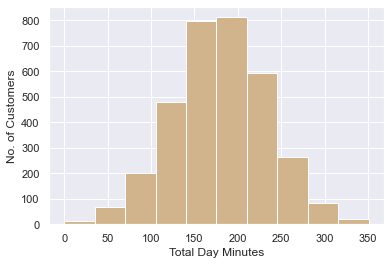

In [5]:
plt.hist(ch['total day minutes'], bins= 10, facecolor= 'tan')
plt.xlabel('Total Day Minutes')
plt.ylabel('No. of Customers')
plt.show()

# 5.How do we categorize the churner and the non-churner for the time spent on day calls(total day minutes)?

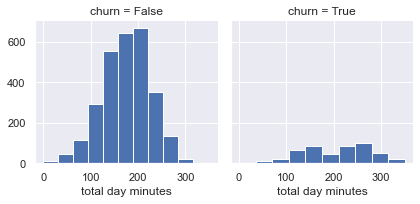

In [6]:
g = sns.FacetGrid(ch, col="churn")
g.map(plt.hist, "total day minutes");

# 6.Find the number of customers who did opt for voice mail plan

In [7]:
ch['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

# 7.Produce a countplot for the above result

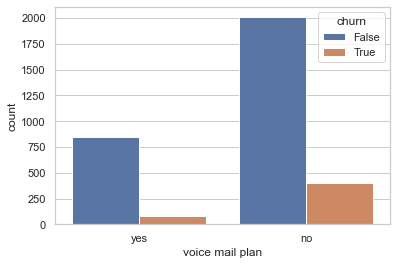

In [8]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="voice mail plan", hue= "churn", data=ch);

# 8.Create a boxplot for a categorical variable(international plan) and continuous variable(area code).

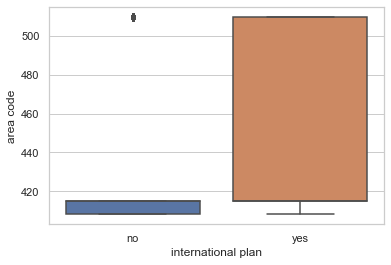

In [9]:
sns.boxplot(x = "international plan", y = "area code", data=ch);

# 9. Create a crosstab for the area code to find the churner or non-churner.

In [10]:
pd.crosstab(ch['area code'],ch['voice mail plan'])

voice mail plan,no,yes
area code,,
408,618,220
415,1184,471
510,609,231


# 10. How to pivot information using python for categorical values? Plot one.

In [11]:
pd.pivot_table(ch, index = ['area code','voice mail plan'], columns=['international plan'], aggfunc=len)

account length      churn       \
international plan                    no  yes    no  yes   
area code voice mail plan                                  
408       no                         567   51   567   51   
          yes                        200   20   200   20   
415       no                        1082  102  1082  102   
          yes                        423   48   423   48   
510       no                         531   78   531   78   
          yes                        207   24   207   24   

                          customer service calls      number vmail messages  \
international plan                            no  yes                    no   
area code voice mail plan                                                     
408       no                                 567   51                   567   
          yes                                200   20                   200   
415       no                                1082  102                  1082   
          yes                                423   48                   423   
510       no                                 531   78                   531   
          yes                                207   24                   207   

                               phone number       ... total intl charge  \
international plan         yes           no  yes  ...                no   
area code voice mail plan                         ...                     
408       no                51          567   51  ...             567.0   
          yes               20          200   20  ...             200.0   
415       no               102         1082  102  ...            1082.0   
          yes               48          423   48  ...             423.0   
510       no                78          531   78  ...             531.0   
          yes               24          207   24  ...             207.0   

                                 total intl minutes        total night calls  \
international plan           yes                 no    yes                no   
area code voice mail plan                                                      
408       no                51.0              567.0   51.0               567   
          yes               20.0              200.0   20.0               200   
415       no               102.0             1082.0  102.0              1082   
          yes               48.0              423.0   48.0               423   
510       no                78.0              531.0   78.0               531   
          yes               24.0              207.0   24.0               207   

                               total night charge        total night minutes  \
international plan         yes                 no    yes                  no   
area code voice mail plan                                                      
408       no                51              567.0   51.0               567.0   
          yes               20              200.0   20.0               200.0   
415       no               102             1082.0  102.0              1082.0   
          yes               48              423.0   48.0               423.0   
510       no                78              531.0   78.0               531.0   
          yes               24              207.0   24.0               207.0   

                                  
international plan           yes  
area code voice mail plan         
408       no                51.0  
          yes               20.0  
415       no               102.0  
          yes               48.0  
510       no                78.0  
          yes               24.0  

[6 rows x 36 columns]

# 11.Now calculate the total international minutes for all the combinations above. 

In [12]:
pd.pivot_table(ch, 'customer service calls', index = ['area code','voice mail plan'], columns=['international plan'])

international plan               no       yes
area code voice mail plan                    
408       no               1.550265  1.666667
          yes              1.430000  1.150000
415       no               1.601664  1.313725
          yes              1.472813  1.708333
510       no               1.606403  1.525641
          yes              1.748792  1.250000

# 12.How do we understand the correlation between the variables or the columns within the dataframe. Plot one and analyze.

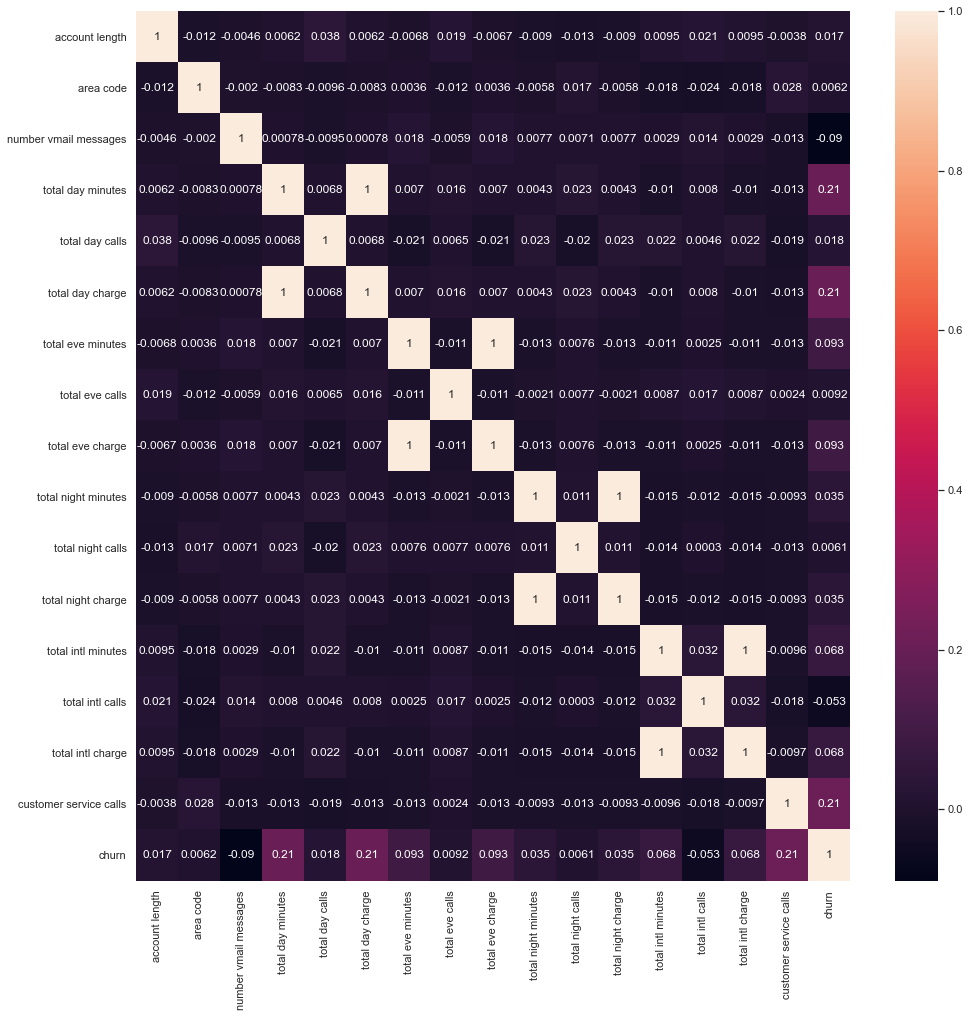

In [13]:
plt.figure(figsize = (16,16))
corr = ch.corr()
sns.heatmap(corr, annot = True);

# 13. Find Standard deviation of total night calls.

In [14]:
ch['total night calls'].std()

19.568609346058615

# 14.Plot a distplot for the above result to look at specifically total night calls.

C:\Users\MuraliSAI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


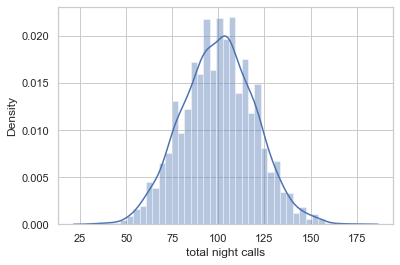

In [15]:
sns.distplot(ch['total night calls']);

# 15.Plot a histogram to group it by churner or non-churner for the column area code.

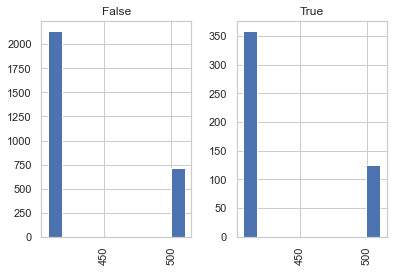

In [16]:
ch.hist(by='churn', column = 'area code');

# 16. Calculate areawise churner or non-churner using countplot.

<AxesSubplot:xlabel='area code', ylabel='count'>

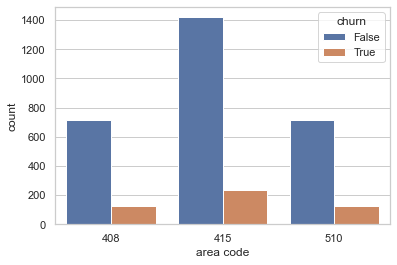

In [17]:
ch['area code']= ch['area code'].astype('category')
sns.countplot(x="area code", hue= "churn", data=ch)